[View in Colaboratory](https://colab.research.google.com/github/neurotrophic/Machine-Learning-with-Colab-/blob/master/collect_and_plot_numpy_arrays.ipynb)

In [1]:
# Adds the ablity to access the members of a object with a string

class Base:
  # calls to the object as a function come here 
  def __call__(self,g):
    # members are stored in the objects dictionary
    return self.__dict__[g]

  # the packing operator simplifies the definition of variables in an inheritance chain
  def __init__(self,*g):
    self.init(g)

class Test1(Base):
  def init(self,g):
    # class with only 1 member
    self.a, = g

class Test2(Base):
  def init(self,g):
    # class with 2 members
    # also compile time checking, this class requires 2 variables for init
    self.a,self.b = g
# simplier than this...
#   def init(self,a,b):
#     self.a = a
#     self.b = b
    
t1 = Test1(1)
t2 = Test2(2,3)
# t3 = Test2(4,5,6)
# ValueError: too many values to unpack (expected 2)

# simple
print(t1('a'))
print(t2('b'))


1
3


In [2]:

class Test3:
  # packing function arguments into a dictionary
  def __call__(self,**kwargs):
    for k, v in kwargs.items():
	    print(k,v)

t3 = Test3()
# simple
t3(a=['one','two'],b=['three'])

# combine and reuse concepts 

class Test4:
  def __call__(self,**kwargs):
    for name, objects in kwargs.items():
      for obj in objects:
        print(obj(name))

t4 = Test4()
# simple expressive power
#print an arbitrary named member from each object
t4(a=[t1,t2],b=[t2])


a ['one', 'two']
b ['three']
1
2
3


In [0]:
# learn some numpy and matlpotlib
# used heavy in machine learning examples
import numpy as np
import matplotlib.pyplot as plt

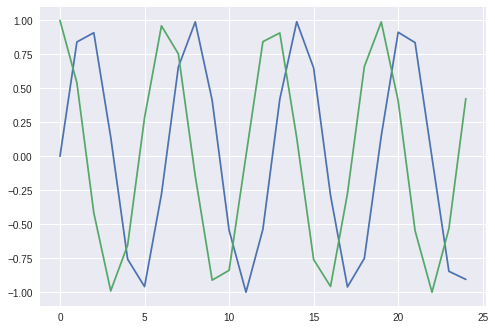

In [4]:
# plot directly from numpy arrays
# list of numbers from 0 to 25
x = np.arange(25)
# list sin value for each element of x
y = np.sin(x)
# list cos value for each element of x
z = np.cos(x)

# add the lists to plt
plt.plot(x,y,z)
# show the graph
plt.show()

# simple but what about multidimensional arrays?


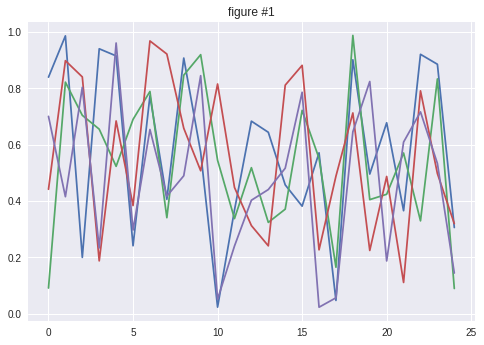

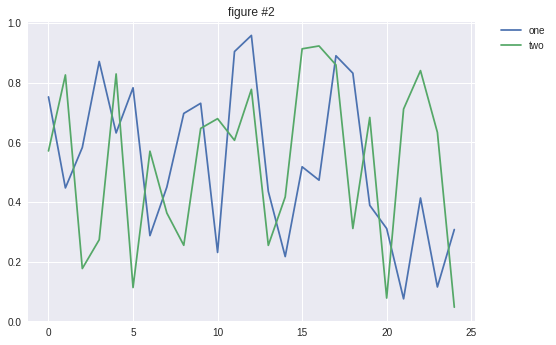

In [5]:
# create some multidimensional data

# create an x-axis
x = np.arange(25)
# 1st demension must match the demensions of x
y = np.random.random((25,4))
z = np.random.random((25,2))

# helper function for adding a legend
def legend(lines,labels):
  plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# add x,y data to fiqure #1
plt.figure(1)
plt.title('figure #1')
plt.plot(x,y)

# add x,z data to fiqure #
plt.figure(2)
plt.title('figure #2')
lines = plt.plot(x,z)
# add legend
legend(lines, ('one', 'two', 'three'))

# show both
plt.show()

In [0]:
# combine and reuse concepts 

# class to hold data, note that it inherties from Base
class Node(Base):
  def init(self,g):
    self.a, = g
  
  # fill with some data 
  def update(self,i):
    self.a[0] = np.sin(i/np.pi)
    self.a[1] = np.cos(i/np.pi)

# class to define, collect and show graph data
class Plot:
  def __init__(self,size=0, **gg):
    # dictionary of name of member and list of objects
    self.gg = gg
    # size to allocate
    self.size = size
    self.alloc()
  
  # dynamically allocate storage for each Node  
  def alloc(self):
    self.list = []
    self.x = np.arange(self.size)
    for name, objects in self.gg.items():
      for obj in objects:
        # note the use of using an object as a function defined in base class
        node = obj(name)
        self.list.append(np.empty((self.size,node.shape[0]),dtype=node.dtype))
   
  # collect and store the data from each Node
  def collect(self,i):
    j = 0
    for name, objects in self.gg.items():
      for obj in objects:
        d = self.list[j]
        node = obj(name)
        np.copyto(d[i],node)
        j += 1
        
  # graph the collected data
  def show(self):
    i = 0
    for item in self.list:
      plt.figure(i)
      plt.plot(self.x,item)
      i += 1

# helper to shorten numpy declarations
zero = lambda *g: np.zeros(g)


[[ 0.          1.        ]
 [ 0.3129618   0.94976572]
 [ 0.59448077  0.80410983]
 [ 0.81627311  0.57766618]
 [ 0.95605566  0.29318523]
 [ 0.99978466 -0.02075161]
 [ 0.94306673 -0.33260358]
 [ 0.79160024 -0.61103933]
 [ 0.5606028  -0.82808484]
 [ 0.2732824  -0.96193385]
 [-0.04149429 -0.99913874]
 [-0.35210211 -0.93596159]
 [-0.62733473 -0.77874972]
 [-0.83953993 -0.54329798]
 [-0.96739776 -0.25326187]
 [-0.99806251  0.0622191 ]
 [-0.92845336  0.371449  ]
 [-0.76556382  0.64335996]
 [-0.52575918  0.85063346]
 [-0.23313227  0.97244503]
 [ 0.08291711  0.99655645]
 [ 0.39063592  0.92054526]
 [ 0.6591081   0.75204821]
 [ 0.86136064  0.50799395]
 [ 0.9770735   0.21290226]]


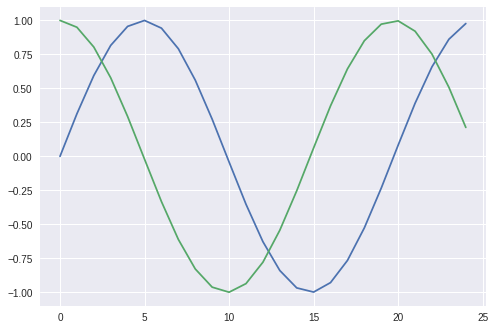

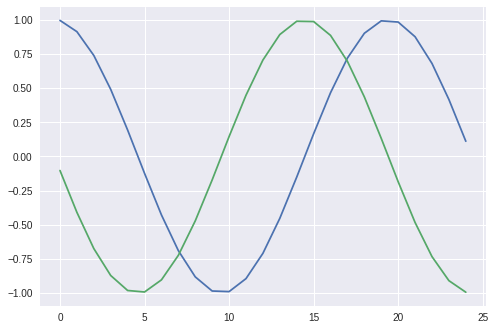

In [8]:
# wrapping up

S = 25

# create some storage Nodes
x = Node(zero(2))
y = Node(zero(2))

# create a Plot to collect the a's from x and y
p = Plot(size=S,a=[x,y])

# loop 
for i in range(S):
  x.update(i)
  y.update(i+S)
  # collect the a's from x and y
  p.collect(i)

# print stored data
print(p.list[0])

# show the graphs
p.show()

# end of line